# Projekt - Uvod u znanost o podacima 
Ovaj dokument sadrži implementaciju projektnog zadatka kolegija "Uvod u znanost o podacima" na Fakultetu elektrotehnike i računarstva. Cilj ovog projekta je replicirati te na kraju poboljšati temu znanstvenog rada "Implementation of Machine Learning Model to Predict Heart Failure Disease."

# Opis projektnog zadataka
Cilj ovog projektnog zadatka je replicirati zatim poboljšati temu znanstvenog rada "Implementation of Machine Learning Model to Predict Heart Failure Disease". Svrha tog znanstvenog rada je razviti prediktivne modele u području medicine, točnije predvidjeti zastoj srca u pacijenta na temelju karakteristika istog pacijenta.

Projekt je podijeljen na četiri dijela:
 - 1. Priprema podataka
 - 2. Vizualizacija podataka
 - 3. Replikacija rezultata
 - 4. Poboljšanje rezultata
 


# 1. Priprema podataka

Podaci su početni korak svakog modela strojnog učenja, stoga potrebno je učitati i upoznati se s tim podacima. Podatkovni skup koji se koristi u implementaciji ovog projekta je "Heart Failure Prediction DataSet" , dostupan na sljedećoj poveznici: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction Prvi korak je učitati podatke. To ćemo učiniti putem Python biblioteke - "Pandas".

In [1]:
#Importing the necessery libarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


U varijablu *data_set* ćemo učitati podatkovni skup. Pogledajmo dimenzije te varijable.

In [2]:
data_set=pd.read_csv("data/heart_cleveland_upload.csv")
print("The dimension of data set is : ",data_set.shape)

The dimension of data set is :  (297, 14)


Kao što je vidljivo u prijašnjem ispisu, vidimo da raspolažemo s 297 podatka , gdje je svaki od njih opisan s 14 varijabli. Na raspolaganju nemamo veliku količinu podatka, s obzirom na to da su modeli strojnog učenja nekada trenirani na podatkovnim skupovima od nekoliko milijuna zapisa. Bez obzira na malu količinu zapisa , i dalje možemo razviti adekvatan model strojnog učenja uz uvjet da su podaci u cijelosti ispravni. Prije provjere ispravnosti podataka pogledajmo pobliže prirodu našeg podatkovnog skupa.

In [3]:
print("Name of the columns: ",list(data_set.columns))

Name of the columns:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']


Imena stupaca su engleske kratice koje opisuju pacijenta i njegovo zdravstveno stanje. Značenje pojedinog stupca se nalazi ispod:
- "age" = Starost ispitanika.
- "sex" = Spol ispitanika.
- "cp" = Razina boli u plućima.
- "trestbps" = Vrijednost krvnog tlaka ispitanika.
- "chol" = Razina kolesterola ispitanika.
- "fbs" = Razina šećera u krvi.
- "restecg" = Rezultat ECG-a pacijenta.
- "thalach" = Najveća vrijednost otkucaja srca u pacijenta.
- "Exang" = Zastavica , koja govori da li vježba uzrokuje upalu grla
- "oldpeak" = Vrijednost koja predstavlja utjecaj depresije na pacijenta.
- "slope" = Zastavica koja predstavlja stanje ispitanika tijekom fizičke aktivnosti
- "ca" = Vrijednost fluoroskopije.
- "thal" = Rezultati Thallium testa (testa za pacijente s poteškoćama u disanju).
- "condition" = Label stupac, koji govori da li je pacijent podložan zastoju srca.

Devet varijabla našeg skupa su kategorijskog tipa. Npr. stupac "cp" koji predstavlja bol u prsima, može poprimiti vrijednost 0,1,2 ili 3. Svaka od tih vrijednosti predstavlja intezitet boli u prsima kod pojedinog pacijenta. Slično vrijedi za dio ostalih varijabli, ali prije nego što pregledamo njihovo ponašanje  pogledajmo s kojim tipom podataka raspolažemo.

In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


Iz gornjeg ispisa vidljivo je da raspolažemo isključivo s numeričkim podacima. Već smo naglasili da su par varijabli kategorijskog tipa kao npr: condition,sex,cp,fbs... 
Iz gornjeg ispisa također vidimo da podaci koji predstavljaju kategorije su već u int64 formatu. To je važno. jer sve kategorijske i binarne varijable u podatkovnom skupu moraju biti numeričkog tipa. U slučaju da nisu bile int64 tipa, to bismo morali ispraviti koristeći OneHotEncoder i LabelEncoder. <br>
U gornjem ispisu možemo također zaključiti da u našem podatkovnom skupu nisu prisutne nedostajuće vrijednosti. 
NaN vrijednosti mogu predstavljati veliku opasnost u izradi modela strojnog učenja i oni zahtijevaju delikatno rukovanje. Moguće ih je zamijeniti sa srednjom vrijednosti ili medijanom. Taj proces ovdje nećemo raditi jer nije potreban.<br>
Pogledajmo sada ponašanje naših numeričkih podataka.

In [5]:
data_set.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Tablica iznad nam daje dobar pregled ponašanja svih varijabli. Iz nje također možemo vidjeti koji su kandidati za stršeće vrijednosti ako usporedimo srednju vrijednost, min i max vrijednost stupca.
U našem podatkovnom skupu postoje dva kandidata za stršeće vrijednosti. To su varijable "chol" , i "oldpeak". Uočimo da maksimalna vrijednost varijable "chol" i "oldpeak" mnogo odstupa od ostalih vrijednosti tih varijabla. Pogledajmo dodatno ponašanje tih varijabla ,ali ovaj put putem box-plot grafa.<br>
Box-plot se sastoji od pravokutnika koji prikazuje podatke od donjeg do gornjeg kvartila. Izgled box-plota ukazuje na stupanj
raspršenosti i asimetričnosti, te može pokazati outliere medu podacima.
Prvo ćemo ispitati vrijednost "chol", zatim vrijednost "oldpeak" varijable.

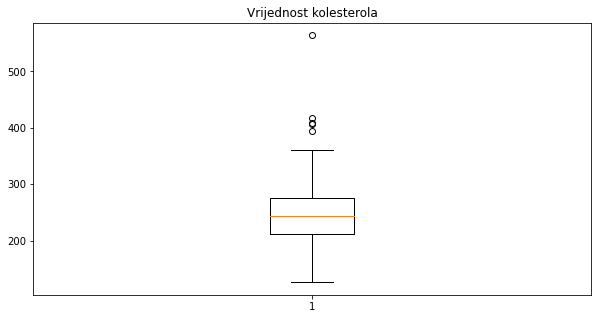

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10, 5))
plt.title("Vrijednost kolesterola")
plt.boxplot(data_set["chol"])
# show plot
plt.show()

Iz gornjeg grafa vidljivo je da maksimalna vrijednost varijable "chol" predstavlja outlier. Pogledajmo bolje o kojem zapisu je točno riječ.

In [7]:
print(data_set[data_set["chol"]==564])

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
79   67    0   2       115   564    0        2      160      0      1.6   

    slope  ca  thal  condition  
79      1   0     2          0  


Outlieri unutar podatkovnog skupa mogu predstavljati neispravne podatke. Ovdje se radi o jednom zapisu kojeg možemo izbrisati jer nosi potencijalno neispravne informacije.Nakon brisanja pogledajmo ponovno ponašanje varijable "chol"

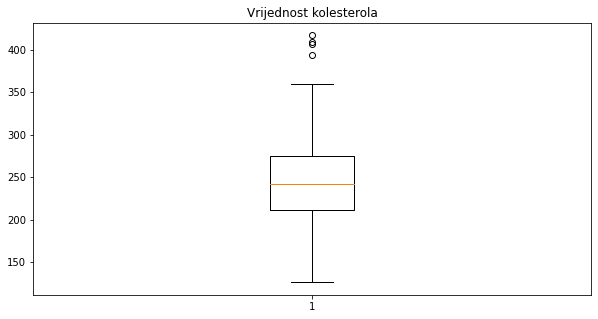

In [8]:
data_set.drop(data_set.index[(data_set["chol"]==564)],axis=0,inplace=True)
plt.figure(figsize =(10, 5))
plt.title("Vrijednost kolesterola")
plt.boxplot(data_set["chol"])
# show plot
plt.show()

Vidljivo  je poboljšanje u varijabli "chol".
Istu stvar ćemo sada napraviti za varijablu "oldpeak", koja predstavlja utjecaj depresije u pacijenta. Pogledajmo ponašanje te varijable na box-plot grafu.

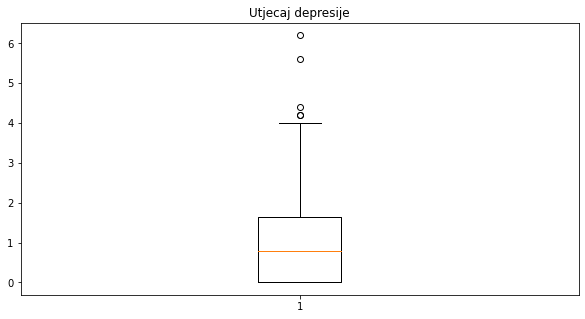

In [9]:
plt.figure(figsize =(10, 5))
plt.title("Utjecaj depresije")
plt.boxplot(data_set["oldpeak"])
# show plot
plt.show()

Vidimo da samo dva pacijenta imaju izrazito veliku vrijednost ove varijable. Prije brisanja ovih podataka prikažimo te podatke u cijelosti

In [10]:
print(data_set[data_set["oldpeak"]>5])

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
186   62    0   3       160   164    0        2      145      0      6.2   
239   55    1   3       140   217    0        0      111      1      5.6   

     slope  ca  thal  condition  
186      2   3     2          1  
239      2   0     2          1  


Utjecaj depresije je osjetljiva informacija kod osobe. Možemo pretpostaviti da visoka vrijednost te varijable u ova dva pacijenta je povezana za visokom šansom zastoja srca (condition=1). Zbog osjetljive prirode ove varijable i činjenice da su samo dva podatka u pitanju, ove zapise ćemo ostaviti u našem skupu.

Ispitivanje kolinearnosti među podacima našeg skupa je još jedna faza u pripremi podataka. Postoji nekoliko načina kako to napraviti. Ovdje ćemo to učiniti putem korelacijske matrice preko *seaborn* biblioteke.

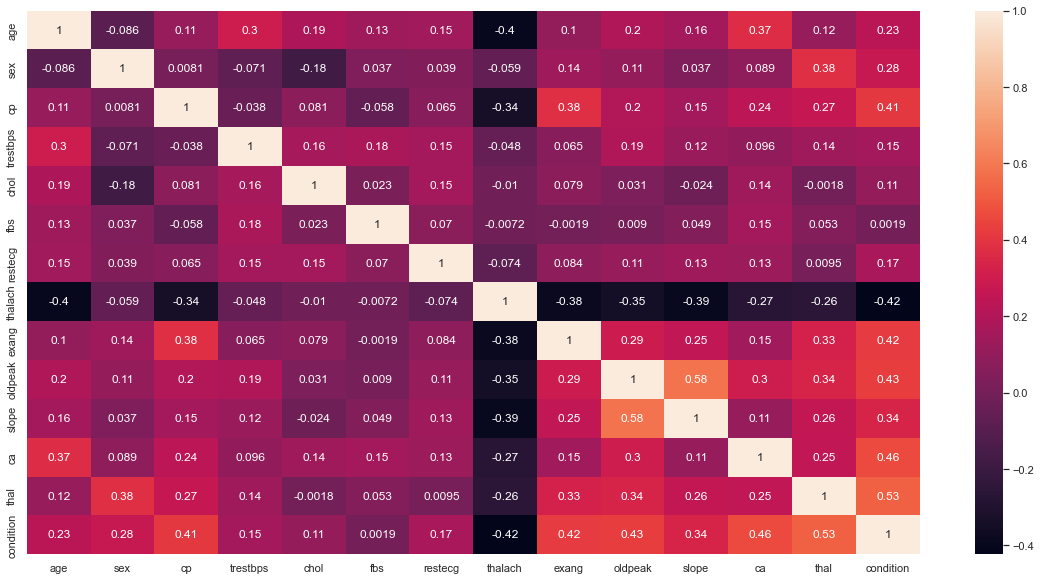

In [11]:
import seaborn as sns
corr_matrix = data_set.corr()
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(corr_matrix, annot=True)
plt.show()

Visoke korelacijske vrijednosti nisu prisutne u našem podatkovnom skupu, i nije potrebno izbacivati varijable iz skupa.

Nakon korelacijske matrice, želimo ispitati monotone atribute našeg dataset-a. To ćemo učiniti s funkcijom nunique koja broji jedinstvene vrijednosti po stupcima.

In [12]:
data_set.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         151
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

Iz gornjeg rezultata možemo zaključiti da naš podatkovni skup ne sadrži monotone varijable koje je potrebno izbaciti iz skupa podataka.

Nakon svih prethodni provjera možemo reći da je naš podatkovni skup ispravan i potpun. Napokon taj podatkovni skup možemo i predstaviti vizualno.

# 2. Vizualizacija podataka

Prvi stupac u našem podatkovnom skupu predstavlja starost ispitanika. Iz prijašnjeg poziva funkcije *data_set.describe()* znamo da je prosječna starost ispitanika 54.5 godina. Sada želimo detaljnije pogledati starost svih ispitanika našeg podatkovno skupa.Za tu svrhu iskoristit ćemo histogram.

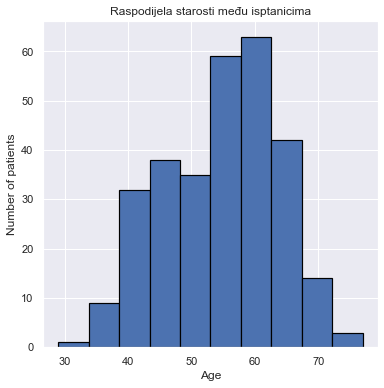

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.hist(data_set["age"], edgecolor='black',linewidth=1.2)
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Raspodijela starosti među isptanicima')
plt.show()


Vidimo da je većina ispitanika starije životne dobi te da nemamo mladih ispitanika. To je i razumljivo s obzirom na to da radimo s podatkovnim skupom koji će služiti za predikciju zastoja srca, koji je više prisutan kod osoba starije životne dobe.<br>
Nakon starosti, ispitajmo kakav je omjer muških i ženskih ispitanika u našem skupu. Za tu vizualizaciju upotrijebit ćemo *Pie-Chart*.

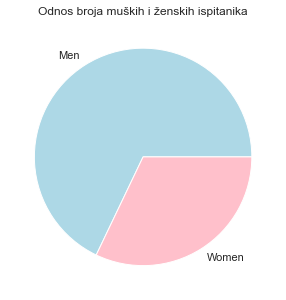

In [14]:
MF=data_set['sex'].value_counts()
MF.columns=["Men","Women"]
plt.figure(figsize=(5,5))
plt.pie(data_set['sex'].value_counts(),labels=["Men","Women"],colors=["lightblue","pink"],)
plt.title("Odnos broja muških i ženskih ispitanika")
plt.show()

Broj muškaraca je znatno veći od broja žena. Danas su mnogo popularne usporedbe između muškaraca i žena. U ovom radu ćemo također pratiti trendove, ali pravit ćemo usporedbe na temelju zdravstvenih podataka koje imamo na raspolaganju.
Započnimo sa zadnjim stupcem condition, čija vrijednost predstavlja visoku(condition = 1) ili nisku šansu (condition = 0) zastoja srca. Pogledajmo kakav je omjer tih šansi kod žena i kod muškaraca.

[112, 89]
[25, 70]


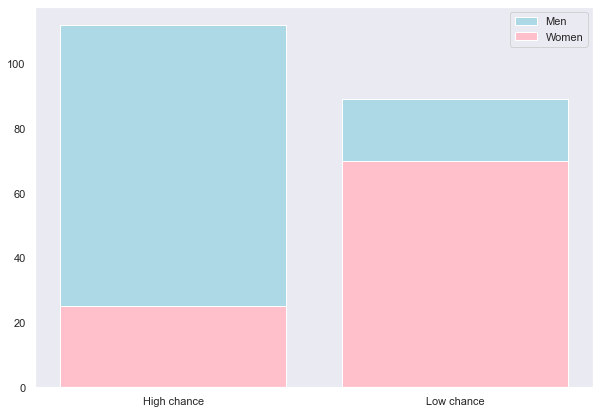

In [15]:
men_with_highC_HF=data_set[data_set["sex"]==1]
men_with_highC_HF=men_with_highC_HF[men_with_highC_HF['condition']==1]

women_with_highC_HF=data_set[data_set["sex"]==0]
women_with_highC_HF=women_with_highC_HF[women_with_highC_HF['condition']==1]

##Calculate data with low chance of heart-failure
men_with_lowC_HF=data_set[data_set["sex"]==1]
men_with_lowC_HF=men_with_lowC_HF[men_with_lowC_HF['condition']==0]

women_with_lowC_HF=data_set[data_set["sex"]==0]
women_with_lowC_HF=women_with_lowC_HF[women_with_lowC_HF['condition']==0]

men=[len(men_with_highC_HF),len(men_with_lowC_HF)]
women=[len(women_with_highC_HF),len(women_with_lowC_HF)]
print(men)
print(women)
x_asis=["High chance","Low chance"]
plt.figure(figsize=(10,7))
plt.bar(x_asis, men, color='lightblue', label='Men')
plt.bar(x_asis, women, color='pink', label='Women')
plt.legend(loc='best')
plt.grid()

Iz iznad prikazanog bar-charta možemo zaključiti da je zastoj srca znatno više prisutan kod muškaraca.Bez obzira na to što graf iznad ukazuje da je veća vjerojatnost zastoja srca kod muškaraca, treba imati na umu da podaci nisu u jednakim omjerima te nije ispravno oslanjati se isključivo na vizualizaciju našeg skupa prilikom zaključivanja odnosa između varijabla.Razumljivo je da broj muškaraca prevladava broj žena u obje kategorije, jer njih ima puno više u našem skupu. Prilikom izrade modela strojnog učenja važno je ostvariti ravnomjernu podjelu između dva skupa.

Prilikom opisa podatkovnog skupa naglasili smo da stupac *chol* predstavlja razinu kolesterola. Sada želimo ispitati kako se vrijednost te varijable mijenja u odnosu na starost ispitanika. Tu promjenu ćemo prikazati posebno za žene i muškarce te na grafovima će biti vidljiva razlika između pacijenata s visokom i niskom šansom zastoja srca.

Text(0, 0.5, 'Vrijednost kolesterola')

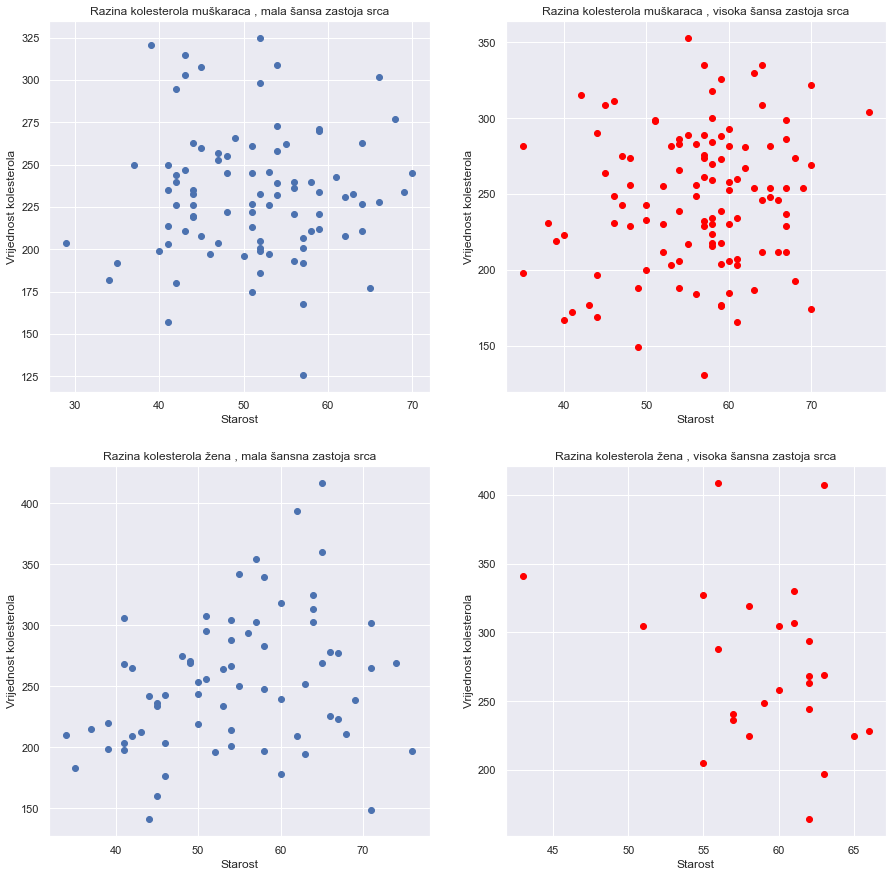

In [16]:
fig, ax = plt.subplots(2, 2,figsize=(15,15))

#Plot graph for men with low chance of HF and chol levels
men_lowC_chol = men_with_lowC_HF["chol"]
age_menLowCCP =np.array(men_with_lowC_HF['age'])


ax[0,0].scatter(age_menLowCCP,men_lowC_chol)
ax[0,0].set_title("Razina kolesterola muškaraca , mala šansa zastoja srca")
ax[0,0].set_xlabel("Starost")
ax[0,0].set_ylabel("Vrijednost kolesterola")

#Plot grapf with high chance of HF and chest pain , and compare results with previous graph
men_highC_chol = men_with_highC_HF["chol"]
age_menHighCCP =np.array(men_with_highC_HF['age'])

ax[0,1].scatter(age_menHighCCP,men_highC_chol,color="red")
ax[0,1].set_title("Razina kolesterola muškaraca , visoka šansa zastoja srca")
ax[0,1].set_xlabel("Starost")
ax[0,1].set_ylabel("Vrijednost kolesterola")


#Plot graph for women with low chance of HF and their chol levels
women_lowC_chol = women_with_lowC_HF["chol"]
age_womenLowCCP =np.array(women_with_lowC_HF['age'])

ax[1,0].scatter(age_womenLowCCP,women_lowC_chol)
ax[1,0].set_title("Razina kolesterola žena , mala šansna zastoja srca")
ax[1,0].set_xlabel("Starost")
ax[1,0].set_ylabel("Vrijednost kolesterola")

#Plot grapf with high chance of HF  and their chol levels , and compare results with previous graph
women_highC_chol=women_with_highC_HF["chol"]
age_womenHighCCP =np.array(women_with_highC_HF['age'])

ax[1,1].scatter(age_womenHighCCP,women_highC_chol,color="red")
ax[1,1].set_title("Razina kolesterola žena , visoka šansna zastoja srca")
ax[1,1].set_xlabel("Starost")
ax[1,1].set_ylabel("Vrijednost kolesterola")

Ako pogledamo pobliže grafove možemo potvrditi da postoji povezanost između starosti i razine kolesterola. Naravno ta povezanost je jača na nekim grafovima ,a slabija na drugim.<br>
Sada želimo pokazati koliko dob nekog pacijenta utječe na vrijednost kolesterola ,ali ovaj put da ne pravimo nikakve podijele unutar našeg skupa. Na istom grafu prikazat ćemo utjecaj starosti na vrijednost kvnog tlaka pacijenta.

<Figure size 720x720 with 0 Axes>

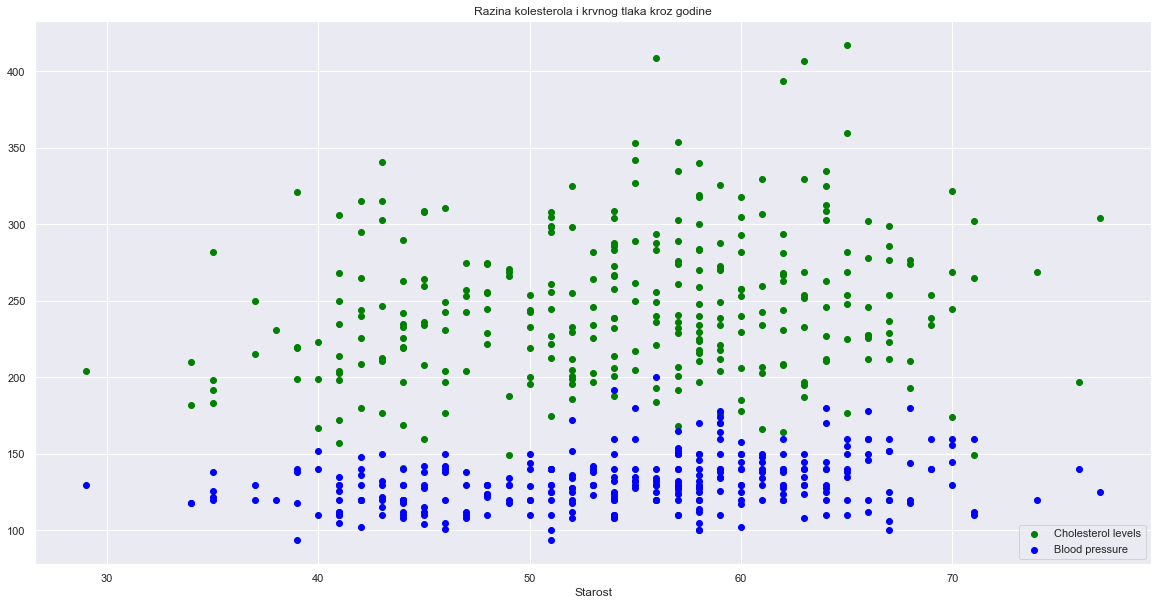

<Figure size 720x720 with 0 Axes>

In [17]:
age_values=data_set["age"]
chol_values=data_set["chol"]
bps_values=data_set["trestbps"]
plt.scatter(age_values,chol_values,color="green", label="Cholesterol levels")
plt.scatter(age_values,bps_values,color="blue", label="Blood pressure")
plt.title("Razina kolesterola i krvnog tlaka kroz godine")
plt.xlabel("Starost")
plt.legend(loc="lower right")
plt.figure(figsize=(10,10))

Vidljivo je da na temelju starost ne možemo predvidjeti razinu krvnog tlaka ili kolesterola osobe, jer osobe iste životne dobi imaju različite vrijednosti kolesterola i kvrnog tlaka. U prijašnjem grafu pokazali smo povezanost između starosti i razine kolesterola u određenim skupinama, ali ovdje ta povezanost nestaje ako gledamo podatkovni skup u cjelini.<br>
Pogledajmo sada kako otkucaj osobe utječe na razinu kolesterola i krvnog tlaka.

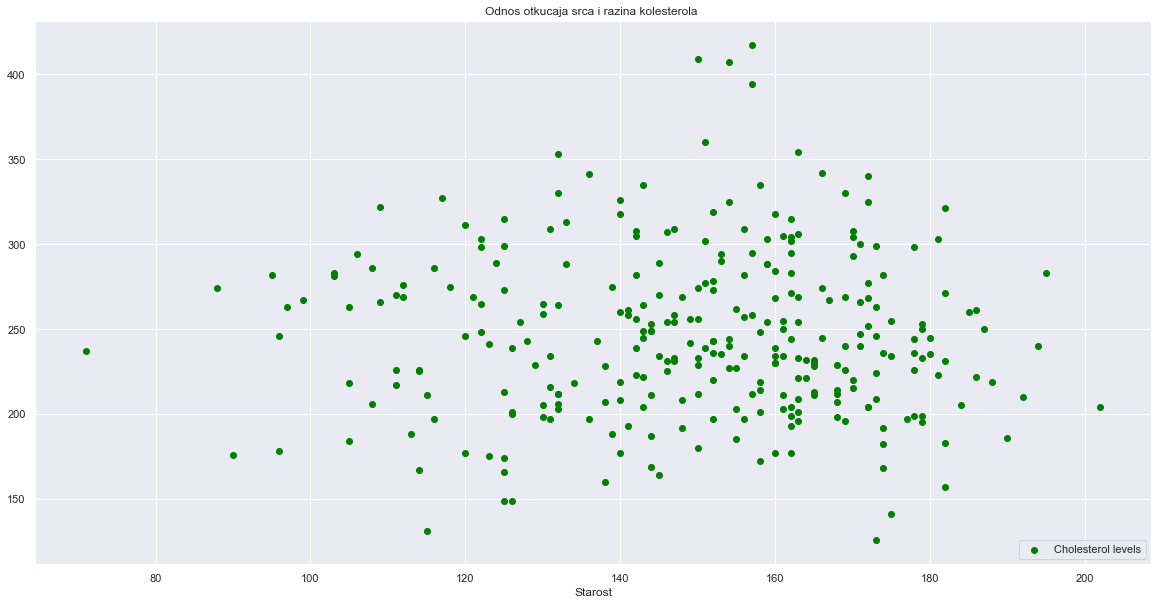

<Figure size 720x720 with 0 Axes>

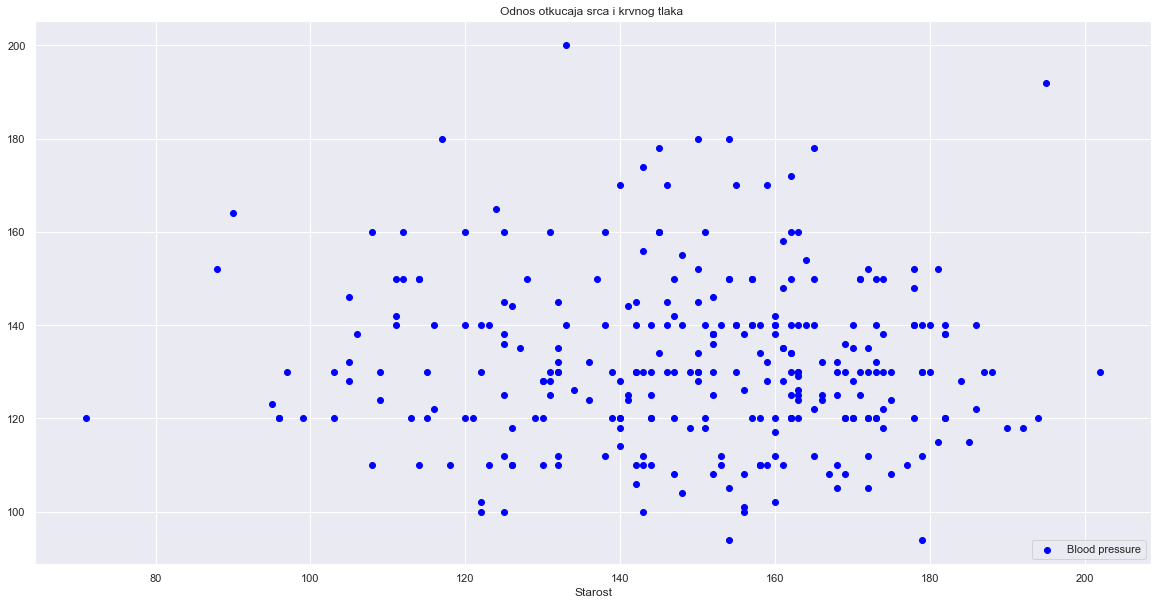

<Figure size 720x720 with 0 Axes>

In [18]:
heartB_values=data_set["thalach"]
chol_values=data_set["chol"]
bps_values=data_set["trestbps"]
plt.scatter(heartB_values,chol_values,color="green", label="Cholesterol levels")
plt.xlabel("Starost")
plt.legend(loc="lower right")
plt.title("Odnos otkucaja srca i razina kolesterola ")
plt.show()
plt.scatter(heartB_values,bps_values,color="blue", label="Blood pressure")
plt.title("Odnos otkucaja srca i krvnog tlaka ")
plt.xlabel("Starost")
plt.legend(loc="lower right")
plt.figure(figsize=(10,10))

Znanstveni rad kojeg smo predstavili na početku, sadrži modele koje predviđaju zastoj srca. Zbog toga u nastavku ćemo se više fokusirati na odnos varijable *condition* i ostalih varijabla u skupu. Više nećemo dijeliti podatkovni skup na ženske i muške ispitanike, te gledati odnos između drugih varijabla u podatkovnog skupu.<br>
Pogledajmo sada prosječnu razinu otkucaja srca te kako se ona razlikuje kod osoba s visokom i niskom šansom zastoja srca.

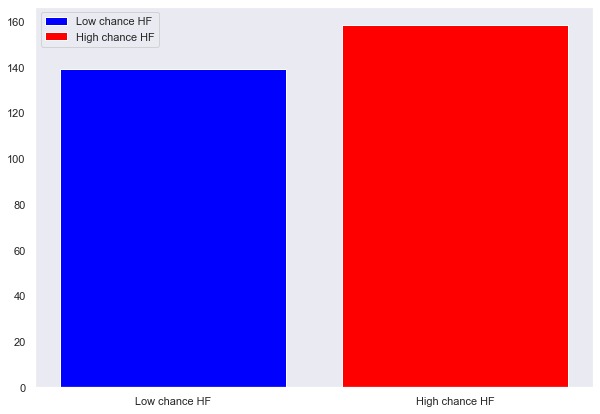

In [19]:
high_chanceHF=data_set[data_set["condition"]==1]
low_chanceHF=data_set[data_set["condition"]==0]
x_asis=["High chance HF","Low chance HF"]

y_HC=np.array(high_chanceHF["thalach"])
y_LC= np.array(low_chanceHF["thalach"])   
               
plt.figure(figsize=(10,7))
plt.bar(x_asis[1],np.mean(y_HC), color='blue', label='Low chance HF')
plt.bar(x_asis[0],np.mean(y_LC), color='red', label='High chance HF')
plt.legend(loc='best')
plt.grid()


Vidimo da osobe s niskom šansom za zastoj srca imaju prosječan otkucaj srca 160 , dok osobe s visokom šansom zastoja srca imaju prosječan otkucaj srca 140. Ova razlika nije velika, ali ipak predstavlja jednu različitost kod ovih kategorija.<br>
Iste razlike ćemo ispitati za ostale varijable u našem podatkovnom skupu.

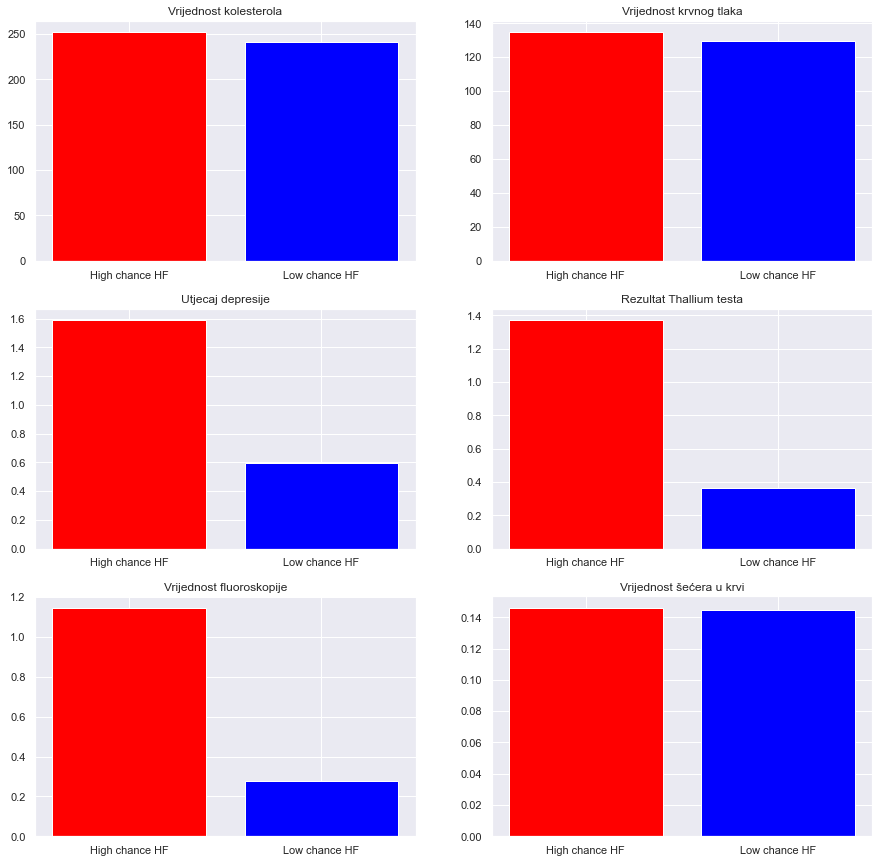

In [20]:
high_chanceHF=data_set[data_set["condition"]==1]
low_chanceHF=data_set[data_set["condition"]==0]
y_HC=np.array(high_chanceHF["chol"])
y_LC= np.array(low_chanceHF["chol"])   
               
fig, ax = plt.subplots(3, 2,figsize=(15,15))

# Index 4 Axes arrays in 4 subplots within 1 Figure: 
ax[0, 0].bar(x_asis,[np.mean(y_HC),np.mean(y_LC)], color=["red","blue"])
ax[0, 0].set_title('Vrijednost kolesterola')

y_HC=np.array(high_chanceHF["trestbps"])
y_LC= np.array(low_chanceHF["trestbps"])  
ax[0, 1].bar(x_asis,[np.mean(y_HC),np.mean(y_LC)], color=["red","blue"])
ax[0, 1].set_title('Vrijednost krvnog tlaka')

y_HC=np.array(high_chanceHF["oldpeak"])
y_LC= np.array(low_chanceHF["oldpeak"])  
ax[1, 0].bar(x_asis,[np.mean(y_HC),np.mean(y_LC)], color=["red","blue"])
ax[1, 0].set_title('Utjecaj depresije')

y_HC=np.array(high_chanceHF["thal"])
y_LC= np.array(low_chanceHF["thal"])  
ax[1, 1].bar(x_asis,[np.mean(y_HC),np.mean(y_LC)], color=["red","blue"])
ax[1, 1].set_title('Rezultat Thallium testa')


y_HC=np.array(high_chanceHF["ca"])
y_LC= np.array(low_chanceHF["ca"])  
ax[2, 0].bar(x_asis,[np.mean(y_HC),np.mean(y_LC)], color=["red","blue"])
ax[2, 0].set_title('Vrijednost fluoroskopije')

y_HC=np.array(high_chanceHF["fbs"])
y_LC= np.array(low_chanceHF["fbs"])  
ax[2, 1].bar(x_asis,[np.mean(y_HC),np.mean(y_LC)], color=["red","blue"])
ax[2, 1].set_title('Vrijednost šećera u krvi')

plt.show()

Na tri grafa vidimo velike razlike između ispitanika s visokom šansom zastoja srca i onih s niskom šansom. Vidimo da osobe s većom vjerojatnosti imaju znatno veče vrijednosti u utjecaju depresije, rezultatu Thallium testa i fluoroskopije. Upravo te varijable mogu imati veliki utjecaj na razvijanje modela strojnog učenja <br>
Sljedeći korak je razviti modele koji će predvidjeti zastoja srca.

# 3 Rekapitulacija rezultata

Nakon što smo predstavili podatke našeg podatkovnog skupa potrebno je implementirati sljedeće algoritme strojnog učenja : 
- 1. Naive Bayes
- 2. Decision Tree
- 3. Random Forest
- 4. Logistics regression
- 5. SVM
       
Na početku smo dokazali da naš podatkovni skup je spreman za implementaciju algoritama strojnog učenja. Sada u našem datasetu nisu prisutne nedostajuće ili stršeće vrijednosti, multikolinearnost, monotonost i slično. Ipak postoji jedna mana našeg podatkovnog skupa, a to je da je premalen. Imamo svega 297 zapisa , što može dovesti do pretreniranog modela strojnog učenja. Problem malog podatkovnog skupa je česta pojava kod medicinskih podataka. Ovaj problem možemo riješiti ako povećamo veličinu podatkovnog skupa. To možemo uraditi putem metode "Data augmentation". Znanstvenici čiji rad želimo replicirati su povećali veličinu podatkovnog skupa tako da su za svaki stupac izabrali nasumičnu vrijednost iz intervala [ min , max ] vrijednost.

Dakle želimo nadodati podatke u našem skupu. To ćemo učiniti tako da prvo naš skup podijelimo na dva dijela: ispitanici s "condition" vrijednosti jednakom 0 odnosno 1. Nadalje te podijele ćemo obogatiti s novim podacima na isti način kako je to urađeno u radu kojeg želimo replicirati.
Započnimo. Prvi korak odvojiti podatke na temelju vrijednosti zadnjeg stupca.

In [21]:
condition_yes=data_set[data_set["condition"]==1]
condition_no=data_set[data_set["condition"]==0]


Nadalje za svaku varijablu u našem podatkovnom skupu ispitat ćemo kako se ponaša unutar iznad definirane skupine.
Započnimo s varijablom "cp" , koja predstavlja razinu boli u prsima. Ona je kategorijska varijabla što je vrlo važno.
Pogledajmo kako se ona ponaša u "condition_yes" podskupu.

In [22]:
arr=condition_yes['cp'].unique()
print("Values of cp in condition_yes : ",condition_yes['cp'].unique())
for el in arr:
    count = condition_yes[condition_yes['cp'] == el ]
    precentage = round((len(count) / len(condition_yes) ) * 100 , 2)
    print("In condition_yes ", precentage,"% have a cp = ",el )


print()    
arr=condition_no['cp'].unique()
print("Values of cp in condition_no : ",condition_no['cp'].unique())
for el in arr:
    count = condition_no[condition_no['cp'] == el ]
    precentage = round((len(count) / len(condition_no) ) * 100 , 2)
    print("In condition_yes ", precentage,"% have a cp = ",el )


Values of cp in condition_yes :  [0 1 2 3]
In condition_yes  5.11 % have a cp =  0
In condition_yes  6.57 % have a cp =  1
In condition_yes  13.14 % have a cp =  2
In condition_yes  75.18 % have a cp =  3

Values of cp in condition_no :  [0 1 2 3]
In condition_yes  10.06 % have a cp =  0
In condition_yes  25.16 % have a cp =  1
In condition_yes  40.25 % have a cp =  2
In condition_yes  24.53 % have a cp =  3


Vidimo iako su u oba podskupa prisutne sve vrijednosti, oba podskupa imaju preferencije za vrijednosti "cp" varijable. Potrebno je te preferencije očuvati prilikom generiranja novih vrijednosti. Generirajmo nove vrijednosti:


In [23]:
new_valuesCP_cYES=[]
new_valuesCP_cNO=[]

for i in range(0,300) : 
    new_valuesCP_cYES.append(np.random.choice([0,1,2,3], p=[0.05, 0.07, 0.13,0.75]))
    new_valuesCP_cNO.append(np.random.choice([0,1,2,3], p=[0.1, 0.25, 0.40,0.25]))


In [24]:
unique, counts=np.unique(new_valuesCP_cYES, return_counts=True)
#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  0  14]
 [  1  15]
 [  2  42]
 [  3 229]]


Isti oblik generiranja, napravit ćemo i za ostale kategoričke varijable.

In [25]:
arr=condition_yes['restecg'].unique()
print("Values of restecg in condition_yes : ",condition_yes['restecg'].unique())
for el in arr:
    count = condition_yes[condition_yes['restecg'] == el ]
    precentage = round((len(count) / len(condition_yes) ) * 100 , 2)
    print("In condition_yes ", precentage,"% have a restecg = ",el )


print()    
arr=condition_no['restecg'].unique()
print("Values of restecg in condition_no : ",condition_no['restecg'].unique())
for el in arr:
    count = condition_no[condition_no['restecg'] == el ]
    precentage = round((len(count) / len(condition_no) ) * 100 , 2)
    print("In condition_no ", precentage,"% have a restecg = ",el )


Values of restecg in condition_yes :  [2 0 1]
In condition_yes  57.66 % have a restecg =  2
In condition_yes  40.15 % have a restecg =  0
In condition_yes  2.19 % have a restecg =  1

Values of restecg in condition_no :  [2 0 1]
In condition_no  41.51 % have a restecg =  2
In condition_no  57.86 % have a restecg =  0
In condition_no  0.63 % have a restecg =  1


In [26]:
new_valuesRESTECG_cYES=[]
new_valuesRESTECG_cNO=[]

for i in range(0,300) : 
    new_valuesRESTECG_cYES.append(np.random.choice([2,0,1], p=[0.57, 0.40, 0.03]))
    new_valuesRESTECG_cNO.append(np.random.choice([2,0,1], p=[0.41 , 0.57 , 0.02]))


In [27]:
arr=condition_yes['exang'].unique()
print("Values of exang in condition_yes : ",condition_yes['exang'].unique())
for el in arr:
    count = condition_yes[condition_yes['exang'] == el ]
    precentage = round((len(count) / len(condition_yes) ) * 100 , 2)
    print("In condition_yes ", precentage,"% have a exang = ",el )


print()    
arr=condition_no['exang'].unique()
print("Values of exang in condition_no : ",condition_no['exang'].unique())
for el in arr:
    count = condition_no[condition_no['exang'] == el ]
    precentage = round((len(count) / len(condition_no) ) * 100 , 2)
    print("In condition_no ", precentage,"% have a restecg = ",el )


Values of exang in condition_yes :  [0 1]
In condition_yes  45.99 % have a exang =  0
In condition_yes  54.01 % have a exang =  1

Values of exang in condition_no :  [0 1]
In condition_no  85.53 % have a restecg =  0
In condition_no  14.47 % have a restecg =  1


In [28]:
new_valuesEXANG_cYES=[]
new_valuesEXANG_cNO=[]

for i in range(0,300) : 
    new_valuesEXANG_cYES.append(np.random.choice([0,1], p=[0.46 , 0.54]))
    new_valuesEXANG_cNO.append(np.random.choice([0,1], p=[0.85 , .15]))


In [29]:
arr=condition_yes['ca'].unique()
print("Values of ca in condition_yes : ",condition_yes['ca'].unique())
for el in arr:
    count = condition_yes[condition_yes['ca'] == el ]
    precentage = round((len(count) / len(condition_yes) ) * 100 , 2)
    print("In condition_yes ", precentage,"% have a ca = ",el )


print()    
arr=condition_no['ca'].unique()
print("Values of ca in condition_no : ",condition_no['ca'].unique())
for el in arr:
    count = condition_no[condition_no['ca'] == el ]
    precentage = round((len(count) / len(condition_no) ) * 100 , 2)
    print("In condition_no ", precentage,"% have a ca = ",el )

Values of ca in condition_yes :  [1 2 0 3]
In condition_yes  32.12 % have a ca =  1
In condition_yes  22.63 % have a ca =  2
In condition_yes  32.85 % have a ca =  0
In condition_yes  12.41 % have a ca =  3

Values of ca in condition_no :  [1 2 0 3]
In condition_no  13.21 % have a ca =  1
In condition_no  4.4 % have a ca =  2
In condition_no  80.5 % have a ca =  0
In condition_no  1.89 % have a ca =  3


In [30]:
new_valuesCA_cYES=[]
new_valuesCA_cNO=[]

for i in range(0,300) :
    new_valuesCA_cYES.append(np.random.choice([1,2,0,3], p=[0.32,0.23,0.33,0.12]))
    new_valuesCA_cNO.append(np.random.choice([1,2,0,3], p=[0.135,0.045,0.8,0.02]))


In [31]:
arr=condition_yes['slope'].unique()
print("Values of slope in condition_yes : ",condition_yes['slope'].unique())
for el in arr:
    count = condition_yes[condition_yes['slope'] == el ]
    precentage = round((len(count) / len(condition_yes) ) * 100 , 2)
    print("In condition_yes ", precentage,"% have a slope = ",el )


print()    
arr=condition_no['slope'].unique()
print("Values of slope in condition_no : ",condition_no['slope'].unique())
for el in arr:
    count = condition_no[condition_no['slope'] == el ]
    precentage = round((len(count) / len(condition_no) ) * 100 , 2)
    print("In condition_no ", precentage,"% have a slope = ",el )

Values of slope in condition_yes :  [1 0 2]
In condition_yes  64.96 % have a slope =  1
In condition_yes  26.28 % have a slope =  0
In condition_yes  8.76 % have a slope =  2

Values of slope in condition_no :  [1 0 2]
In condition_no  29.56 % have a slope =  1
In condition_no  64.78 % have a slope =  0
In condition_no  5.66 % have a slope =  2


In [32]:
new_valuesSLOPE_cYES=[]
new_valuesSLOPE_cNO=[]

for i in range(0,300) :
    new_valuesSLOPE_cYES.append(np.random.choice([1,0,2], p=[0.65,0.26,0.09]))
    new_valuesSLOPE_cNO.append(np.random.choice([1,0,2], p=[0.3,0.65,0.05]))


In [33]:
arr=condition_yes['fbs'].unique()
print("Values of fbs in condition_yes : ",condition_yes['fbs'].unique())
for el in arr:
    count = condition_yes[condition_yes['fbs'] == el ]
    precentage = round((len(count) / len(condition_yes) ) * 100 , 2)
    print("In condition_yes ", precentage,"% have a fbs = ",el )


print()    
arr=condition_no['fbs'].unique()
print("Values of slope in condition_no : ",condition_no['fbs'].unique())
for el in arr:
    count = condition_no[condition_no['fbs'] == el ]
    precentage = round((len(count) / len(condition_no) ) * 100 , 2)
    print("In condition_no ", precentage,"% have a fbs = ",el )

Values of fbs in condition_yes :  [1 0]
In condition_yes  14.6 % have a fbs =  1
In condition_yes  85.4 % have a fbs =  0

Values of slope in condition_no :  [1 0]
In condition_no  14.47 % have a fbs =  1
In condition_no  85.53 % have a fbs =  0


In [34]:
new_valuesFBS_cYES=[]
new_valuesFBS_cNO=[]

for i in range(0,300) :
    new_valuesFBS_cYES.append(np.random.choice([1,0], p=[0.146,0.854]))
    new_valuesFBS_cNO.append(np.random.choice([1,0], p=[0.1447,0.8553]))


In [35]:
arr=condition_yes['thal'].unique()
print("Values of thal in condition_yes : ",condition_yes['thal'].unique())
for el in arr:
    count = condition_yes[condition_yes['thal'] == el ]
    precentage = round((len(count) / len(condition_yes) ) * 100 , 2)
    print("In condition_yes ", precentage,"% have a thal = ",el )


print()    
arr=condition_no['thal'].unique()
print("Values of thal in condition_no : ",condition_no['thal'].unique())
for el in arr:
    count = condition_no[condition_no['thal'] == el ]
    precentage = round((len(count) / len(condition_no) ) * 100 , 2)
    print("In condition_no ", precentage,"% have a thal = ",el )

Values of thal in condition_yes :  [0 2 1]
In condition_yes  27.01 % have a thal =  0
In condition_yes  64.23 % have a thal =  2
In condition_yes  8.76 % have a thal =  1

Values of thal in condition_no :  [0 2 1]
In condition_no  79.87 % have a thal =  0
In condition_no  16.35 % have a thal =  2
In condition_no  3.77 % have a thal =  1


In [36]:
new_valuesTHAL_cYES=[]
new_valuesTHAL_cNO=[]

for i in range(0,300) :
    new_valuesTHAL_cYES.append(np.random.choice([0,2,1], p=[0.2701,0.6423,0.0876]))
    new_valuesTHAL_cNO.append(np.random.choice([0,2,1], p=[0.8,0.16,0.04]))


In [37]:
arr=condition_yes['sex'].unique()
print("Values of sex in condition_yes : ",condition_yes['sex'].unique())
for el in arr:
    count = condition_yes[condition_yes['sex'] == el ]
    precentage = round((len(count) / len(condition_yes) ) * 100 , 2)
    print("In condition_yes ", precentage,"% have a sex = ",el )


print()    
arr=condition_no['sex'].unique()
print("Values of sex in condition_no : ",condition_no['sex'].unique())
for el in arr:
    count = condition_no[condition_no['sex'] == el ]
    precentage = round((len(count) / len(condition_no) ) * 100 , 2)
    print("In condition_no ", precentage,"% have a thal = ",el )
    

Values of sex in condition_yes :  [1 0]
In condition_yes  81.75 % have a sex =  1
In condition_yes  18.25 % have a sex =  0

Values of sex in condition_no :  [1 0]
In condition_no  55.97 % have a thal =  1
In condition_no  44.03 % have a thal =  0


In [38]:

new_valuesSEX_cYES=[]
new_valuesSEX_cNO=[]

for i in range(0,300) :
    new_valuesSEX_cYES.append(np.random.choice([1,0], p=[0.82,0.18]))
    new_valuesSEX_cNO.append(np.random.choice([1,0], p=[0.56,0.44]))

Generirali smo nove kategoričke podatke. Isto trebamo napraviti za ostale kontinuirane varijable. I dalje ćemo zadržati podjelu skupa na condition_yes i condition_no te na temelju njihovih min i max vrijednosti za pojedine varijable, generirat ćemo nove primjere. 
Pogledajmo varijablu "age", koja predstavlja starost ispitanika.

In [39]:
import random
new_valuesAGE_cYES=[]
new_valuesAGE_cNO=[]

print(min(condition_no['age']),max(condition_no['age']))
print(min(condition_yes['age']),max(condition_yes['age']))

for i in range(0,300):
    new_valuesAGE_cNO.append(random.randint(min(condition_no['age']),max(condition_no['age'])))
    new_valuesAGE_cYES.append(random.randint(min(condition_yes['age']),max(condition_yes['age'])))


29 76
35 77


Isti način generiranja podataka upotrijebit ćemo za preostale varijable.

In [40]:
new_valuesTRESTBPS_cYES=[]
new_valuesTRESTBPS_cNO=[]

print("Trest bps")
print("Min , max for conditionNO",min(condition_no['trestbps']),max(condition_no['trestbps']))
print("Min , max for conditionYES",min(condition_yes['trestbps']),max(condition_yes['trestbps']))

for i in range(0,300):
    new_valuesTRESTBPS_cNO.append(random.randint(min(condition_no['trestbps']),max(condition_no['trestbps'])))
    new_valuesTRESTBPS_cYES.append(random.randint(min(condition_yes['trestbps']),max(condition_yes['trestbps'])))


Trest bps
Min , max for conditionNO 94 180
Min , max for conditionYES 100 200


In [41]:
new_valuesCHOL_cYES=[]
new_valuesCHOL_cNO=[]

print("Chol")
print("Min , max for conditionNO",min(condition_no['chol']),max(condition_no['chol']))
print("Min , max for conditionYES",min(condition_yes['chol']),max(condition_yes['chol']))

for i in range(0,300):
    new_valuesCHOL_cNO.append(random.randint(min(condition_no['chol']),max(condition_no['chol'])))
    new_valuesCHOL_cYES.append(random.randint(min(condition_yes['chol']),max(condition_yes['chol'])))


Chol
Min , max for conditionNO 126 417
Min , max for conditionYES 131 409


In [42]:
new_valuesTHALACH_cYES=[]
new_valuesTHALACH_cNO=[]

print("THALACH")
print("Min , max for conditionNO",min(condition_no['thalach']),max(condition_no['thalach']))
print("Min , max for conditionYES",min(condition_yes['thalach']),max(condition_yes['thalach']))

for i in range(0,300):
    new_valuesTHALACH_cNO.append(random.randint(min(condition_no['thalach']),max(condition_no['thalach'])))
    new_valuesTHALACH_cYES.append(random.randint(min(condition_yes['thalach']),max(condition_yes['thalach'])))

THALACH
Min , max for conditionNO 96 202
Min , max for conditionYES 71 195


In [43]:
new_valuesOLDPEAK_cYES=[]
new_valuesOLDPEAK_cNO=[]

print("OLDPEAK")
print("Min , max for conditionNO",min(condition_no['oldpeak']),max(condition_no['oldpeak']))
print("Min , max for conditionYES",min(condition_yes['oldpeak']),max(condition_yes['oldpeak']))

for i in range(0,300):
    new_valuesOLDPEAK_cNO.append(round(random.uniform(min(condition_no['oldpeak']),max(condition_no['oldpeak'])),1))
    new_valuesOLDPEAK_cYES.append(round(random.uniform(min(condition_yes['oldpeak']),max(condition_yes['oldpeak'])),1))

OLDPEAK
Min , max for conditionNO 0.0 4.2
Min , max for conditionYES 0.0 6.2


Generirali smo nove podatke. Ukupno 600 njih , po 300 za oba podskupa po varijabli "condition" koju je potrebno predvidjeti putem ML algoritama. Sljedeći korak je spajanje novih i stari podataka.

In [44]:
NO_array =np.zeros(300)
NO_array = np.array(NO_array, dtype='int64')

newData_NO = {
    "age":      np.array(new_valuesAGE_cNO, dtype='int64'),
    "sex":      np.array(new_valuesSEX_cNO, dtype='int64'),
    "cp":       np.array(new_valuesCP_cNO, dtype='int64'),
    "trestbps": np.array(new_valuesTRESTBPS_cNO, dtype='int64'),
    "chol":     np.array(new_valuesCHOL_cNO, dtype='int64'),
    "fbs":      np.array(new_valuesFBS_cNO, dtype='int64'),
    "restecg":  np.array(new_valuesRESTECG_cNO, dtype='int64'),
    "thalach":  np.array(new_valuesTHALACH_cNO, dtype='int64'),
    "exang":    np.array(new_valuesEXANG_cNO, dtype='int64'),
    "oldpeak":  np.array(new_valuesOLDPEAK_cNO),
    "slope":    np.array(new_valuesSLOPE_cNO, dtype='int64'),
     "ca":      np.array(new_valuesCA_cNO, dtype='int64'),
    "thal":     np.array(new_valuesTHAL_cNO, dtype='int64'),
    "condition": NO_array
}

dfNew_NO = pd.DataFrame(newData_NO)
print(dfNew_NO)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    0   3       179   364    0        0      130      0      4.2   
1     33    1   2       174   302    0        0      132      0      0.2   
2     33    1   3       148   161    0        2      107      0      1.7   
3     66    1   2       131   276    0        2      131      0      1.3   
4     63    0   3       113   273    0        0      142      1      1.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
295   63    0   1       107   324    0        0      159      0      1.6   
296   47    1   2       130   230    0        2      101      0      0.1   
297   67    1   2       158   410    0        0      158      0      4.0   
298   69    1   3        98   360    0        0      100      0      3.3   
299   49    1   2       118   270    0        0      158      0      2.6   

     slope  ca  thal  condition  
0        1   0     0          0  
1        0   0     

In [45]:
YES_array =np.ones(300)
YES_array = np.array(YES_array, dtype='int64')

newData_YES = {
    "age":      np.array(new_valuesAGE_cYES, dtype='int64'),
    "sex":      np.array(new_valuesSEX_cYES, dtype='int64'),
    "cp":       np.array(new_valuesCP_cYES, dtype='int64'),
    "trestbps": np.array(new_valuesTRESTBPS_cYES, dtype='int64'),
    "chol":     np.array(new_valuesCHOL_cYES, dtype='int64'),
    "fbs":      np.array(new_valuesFBS_cYES, dtype='int64'),
    "restecg":  np.array(new_valuesRESTECG_cYES, dtype='int64'),
    "thalach":  np.array(new_valuesTHALACH_cYES, dtype='int64'),
    "exang":    np.array(new_valuesEXANG_cYES, dtype='int64'),
    "oldpeak":  np.array(new_valuesOLDPEAK_cYES),
    "slope":    np.array(new_valuesSLOPE_cYES, dtype='int64'),
     "ca":      np.array(new_valuesCA_cYES, dtype='int64'),
    "thal":     np.array(new_valuesTHAL_cYES, dtype='int64'),
    "condition": YES_array
}

dfNew_YES = pd.DataFrame(newData_YES)
print(dfNew_YES)




     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     53    0   3       146   314    0        2      131      1      1.1   
1     43    1   1       185   362    0        0      150      1      5.9   
2     52    1   2       107   326    0        2      105      0      1.0   
3     58    0   3       129   184    0        0      189      0      3.0   
4     41    1   3       122   266    0        2       80      1      1.3   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
295   64    1   3       102   376    1        2      195      0      2.3   
296   67    1   3       129   197    1        2      107      0      0.0   
297   72    1   3       111   254    0        2      138      0      0.4   
298   48    1   3       131   342    0        0      168      1      3.8   
299   60    1   3       107   368    0        2       95      0      0.2   

     slope  ca  thal  condition  
0        1   0     0          1  
1        1   1     

In [46]:
full_new_data = dfNew_YES.append(dfNew_NO, ignore_index=True)
full_new_data = full_new_data.sample(frac=1)
print(full_new_data)

newly_generaterData=full_new_data
original_data = data_set

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
100   41    1   3       183   303    0        2      121      0      5.3   
285   35    1   3       157   250    0        2      113      1      4.2   
13    44    1   3       105   388    0        0      185      1      5.9   
74    39    0   3       100   143    1        0       78      1      5.3   
398   60    0   2       165   416    0        0      198      0      3.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
122   50    1   3       123   229    1        0      117      0      1.0   
395   53    1   2       113   298    1        0      200      0      2.2   
51    57    1   3       101   402    0        0      182      1      2.2   
590   47    1   1       100   273    0        2      157      0      1.2   
85    68    1   3       126   324    0        2      120      0      2.0   

     slope  ca  thal  condition  
100      1   0     0          1  
285      1   3     

C:\Users\Pc\AppData\Local\Temp\ipykernel_61992\244835619.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_new_data = dfNew_YES.append(dfNew_NO, ignore_index=True)


Generirali smo 600 novih podataka, sada ćemo spojiti sve podatke koje imamo i započeti s izradom algoritama strojnog učenja.

In [47]:
all_data = full_new_data.append(data_set, ignore_index=True)
all_data = all_data.sample(frac=1)
print(all_data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
166   48    1   3       140   247    0        0      161      0      3.7   
822   57    1   3       140   192    0        0      148      0      0.4   
399   58    1   2       174   135    1        0      134      0      0.3   
330   64    1   3       155   185    0        0      160      1      5.7   
160   56    1   3       158   400    0        0      108      1      2.2   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
225   49    1   2       118   270    0        0      158      0      2.6   
730   48    1   2       124   255    1        0      175      0      0.0   
752   37    1   2       130   250    0        0      187      0      3.5   
642   55    0   1       132   342    0        0      166      0      1.2   
333   42    1   3       200   364    0        0      177      1      2.3   

     slope  ca  thal  condition  
166      1   1     0          1  
822      1   0     

C:\Users\Pc\AppData\Local\Temp\ipykernel_61992\3879365561.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = full_new_data.append(data_set, ignore_index=True)


Sada imam 896 podataka. Započnimo s implementacijom algoritama strojnog učenja.

## 3.1 Decision Tree

Prvi algoritam koji ćemo implementirati je Decision Tree. Ovaj klasifikacijski algoritam ima veliku prednost što je interpretabilan. Algoritam gradi stablo čiji čvorovi predstavljaju vrijednost određene varijable. Na temelju toga da li neki podatak zadovoljava uvjet put prema klasifikaciji nastavlja lijevo ili desno.
Veliki problem algoritama strojnog učenja je prenaučenost.Može biti rezultat premalenog broja podataka ili presloženim modelom. Broj podataka smo povećali sada želimo da ne odaberemo presložen model. To ćemo uraditi putem cross-validation, preko biblioteke GridSearchCV

In [48]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import sys
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


features=all_data.columns[:len(all_data.columns)-1]
#print(features)
X = all_data[features]
y = all_data['condition']

X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)



Naš X_train i X_test skup raspolaže kategoričkim i kontinuiranim značajkama. Prilikom opisa varijabli podatkovnog skupa naglašeno je da te različite kategorije imaju veliku razliku u rasponu. Pogledajmo kako se ponaša kontinuirana varijabla "trestbps" i kategorička varijabla "cp" na histogramu.

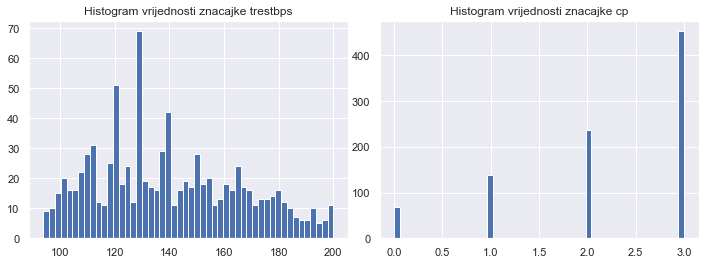

In [49]:

figure(figsize(12, 4))
subplots_adjust(wspace=0.1)
subplot(1,2,1)
hist(X["trestbps"], bins = 50); title('Histogram vrijednosti znacajke trestbps');
subplot(1,2,2)
hist(X["cp"], bins = 50); title('Histogram vrijednosti znacajke cp');

Značajke s kojima raspolažemo u X_train i X_test skupu su različitih magnituda. Ako je razlika u magnitudama značajki to će uzrokovati lošiju generalizaciju naših modela. Konkretno one značajke koje imaju veće vrijednosti će dominirati u našim modelima iako oni možda nisu najbitnije značajke među našim podacima. Zbog toga potrebno je sve značajke skalirati na određeni interval. To ćemo učiniti putem biblioteke StandardScaler koja provodi standardizaciju nad našim značajkama. Postoje drugi načini skaliranja, kao što su MinMaxScaler , ali StandardScaler se u većini slučajeva pokazuje boljim.

In [50]:
from sklearn.preprocessing import StandardScaler
x_train_copy=X_train
scaler=StandardScaler();
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
    

Nakon skaliranja, pogledajmo kako se promijenio raspon naših značajki.

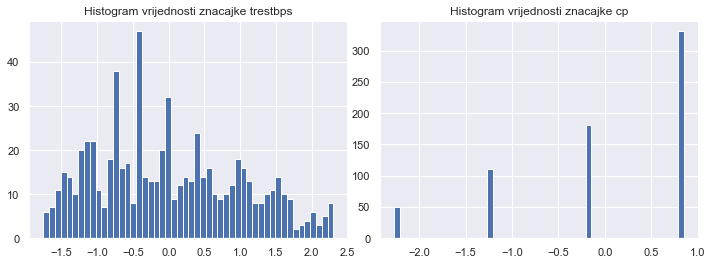

In [51]:
x0 = scaler.fit_transform(X_train[:,3].reshape(-1,1), y)
x1 = scaler.fit_transform(X_train[:,2].reshape(-1,1), y)

figure(figsize(12, 4))
subplots_adjust(wspace=0.1)
subplot(1,2,1)
hist(x0, bins = 50); title('Histogram vrijednosti znacajke trestbps');
subplot(1,2,2)
hist(x1, bins = 50); title('Histogram vrijednosti znacajke cp');

Podaci i značajke su spremni za daljini rad. Sada ćemo trenirati modele, ali ne bilo kakve modele unutar klase algoritma već optimalne. Optimalne parametre svakog modela ćemo naći putem GridSearchCV koji na skupu za učenje pronalazi najbolje hiperparametre za taj model. Za Decision Tree hiperparametr je dubina stabla.

In [52]:

#Need to find the best depth
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print ("The best max depth is ",clf.best_params_)
best_depth=clf.best_params_["max_depth"]


dtree = DecisionTreeClassifier(max_depth=best_depth)
dtree.fit(X_train, y_train)

tree.plot_tree(dtree, feature_names=features,class_names=["0","1"],filled=True)
#text_representation = tree.export_text(dtree)
#print(text_representation)
#Two  lines to make our compiler able to draw:
plt.savefig('my_plot.png', dpi=300)
plt.close()


The best max depth is  {'max_depth': 6}


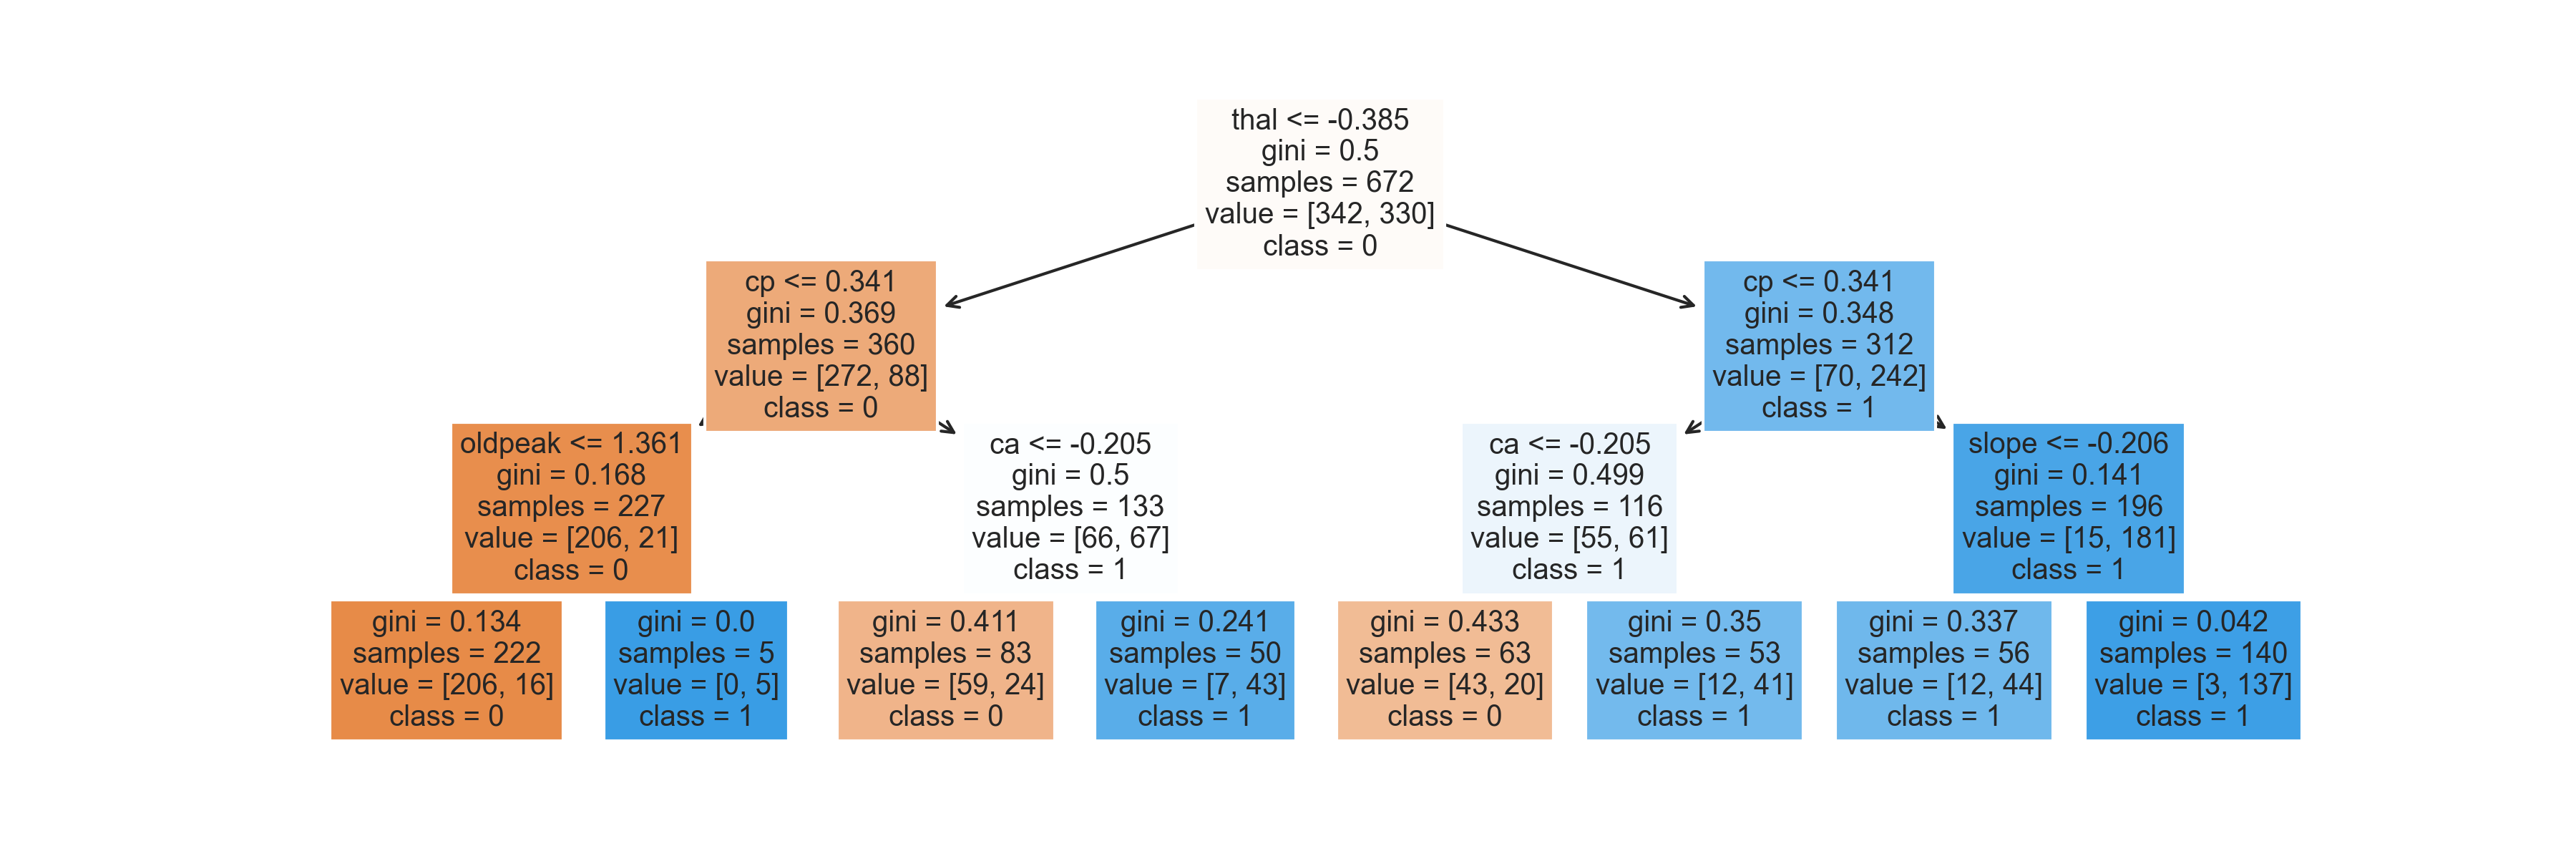

Nakon treniranja optimalnog modela potrebno je testirati model. Rezultate ćemo prikazati preko f1 score, recall, i accuracy vrijednosti te putem confusion matrix.

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       104
           1       0.90      0.74      0.81       120

    accuracy                           0.82       224
   macro avg       0.83      0.82      0.82       224
weighted avg       0.83      0.82      0.82       224

Accuracy: 0.8169642857142857


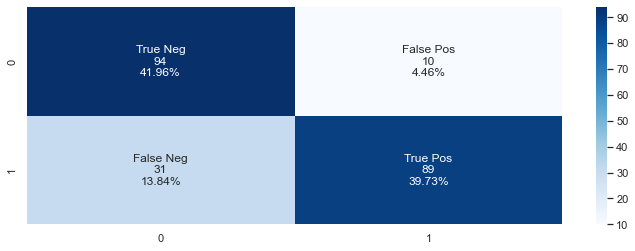

In [53]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

y_pred = dtree.predict(X_test)

cm = confusion_matrix(y_test,y_pred)


group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## 3.2 Logistička regresija

Logistička regresija je klasifikacijski algoritam strojnog učenja. Također zahtjeva optimizaciju koju ćemo također provesti putem GridSearchCV biblioteke. Nako treniranja, ispitat ćemo točnost modela.

Tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
Accuracy of the optimal model : 0.8512071992976296
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       104
           1       0.93      0.88      0.91       120

    accuracy                           0.90       224
   macro avg       0.90      0.90      0.90       224
weighted avg       0.90      0.90      0.90       224



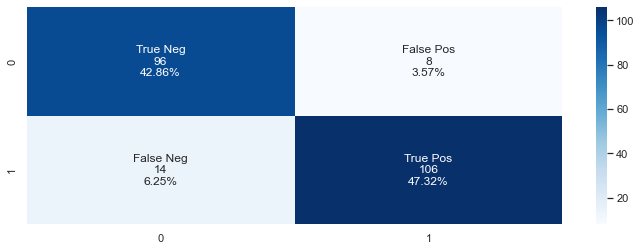

In [54]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy of the optimal model :",logreg_cv.best_score_)

C=logreg_cv.best_params_["C"]
reg_type=logreg_cv.best_params_["penalty"]

model_LogRef = LogisticRegression(C=C,penalty=reg_type).fit(X_train, y_train)

cm = confusion_matrix(y_test, model_LogRef.predict(X_test))

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

print(classification_report(y_test, model_LogRef.predict(X_test)))

## 3.3 Stroj potpornih vektora

Ovaj algoritam se može koristiti za regresijske i klasifikacijeske primjere. Implementiran je putem SVC biblioteke iz paketa sklearn.svm. Kao i svi modeli zahtjeva optimiranje hiperparametara modela. To ćemo opet uraditi putem GridSearchCV

In [55]:
# defining parameter range
from sklearn.svm import SVC  
param_grid = {'C': [1, 10, 15], 
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print("Best parametars : ",grid.best_params_)
  


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.837 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.867 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.836 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.858 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.843 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.859 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.874 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.836 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.828 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.526 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;,

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       104
           1       0.93      0.83      0.88       120

    accuracy                           0.88       224
   macro avg       0.88      0.88      0.88       224
weighted avg       0.89      0.88      0.88       224



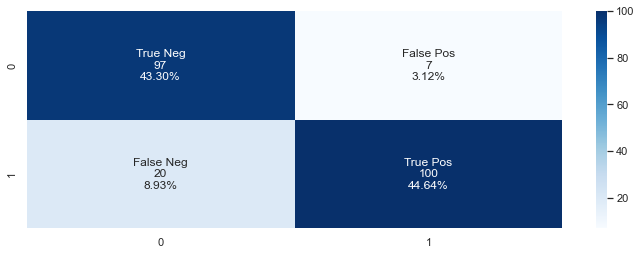

In [56]:
C=grid.best_params_["C"]
gamma=grid.best_params_["gamma"]
kernel=grid.best_params_["kernel"]
SVM_model = SVC(kernel=kernel,C=C,gamma=gamma) 
  
# fitting x samples and y classes 
SVM_model.fit(X_train, y_train) 
cm = confusion_matrix(y_test, SVM_model.predict(X_test))

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

print(classification_report(y_test, SVM_model.predict(X_test)))

## 3.4 Random Forest


Random Forest je također jedna vrsta klasifikacijskog algoritma strojnog učenja. Tijekom učenja generira određeni broj decision tree-a. Pogledajmo kako ovaj algoritam radi nad našim skupom.

In [57]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6],
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)


{'max_depth': 6, 'max_features': 'auto'}


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       104
           1       0.95      0.88      0.91       120

    accuracy                           0.91       224
   macro avg       0.91      0.91      0.91       224
weighted avg       0.91      0.91      0.91       224



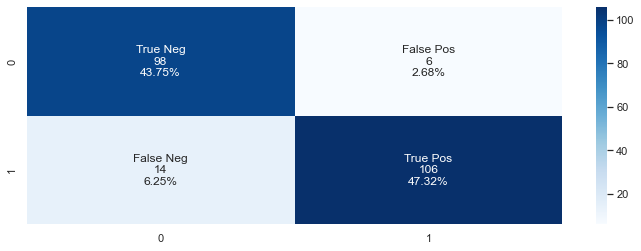

In [58]:
rf=RandomForestClassifier(max_depth =CV_rfc.best_params_["max_depth"] ,
                          max_features = CV_rfc.best_params_["max_features"]).fit(X_train, y_train)


cm = confusion_matrix(y_test, rf.predict(X_test))

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

print(classification_report(y_test, rf.predict(X_test)))

## 3.5 Naive Bayes


Posljednji algoritam kojeg ćemo implementirati je "Naive Bayes". On pretpostavlja nezavisnost među značajkama. Pogeldajmo kako se ponaša nad našim skupom podataka

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       104
           1       0.92      0.92      0.92       120

    accuracy                           0.92       224
   macro avg       0.91      0.92      0.91       224
weighted avg       0.92      0.92      0.92       224



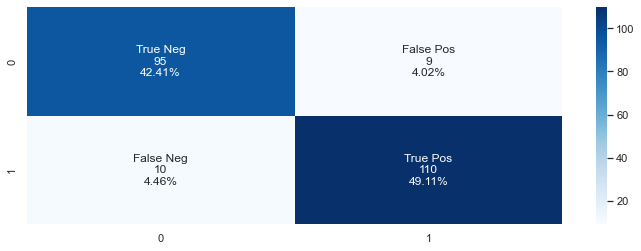

In [59]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, gnb.predict(X_test))

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

print(classification_report(y_test, gnb.predict(X_test)))

### 4. Poboljšanje rezultata.

U skolpu ovog projekta implementirali smo pet modela strojnog učenja, kao što su to uradili u znanstvenom radu kojeg smo predstavili u uvodu ovog dokumenta. Iako smo razivili modele i do 90% točnosti, postoji mana kod treniranja i testiranja tih modela.

Naglasili smo da orginalni dataset ima svega oko 300 zapisa, što nije dovoljno da treniramo model jer može dovesti do prenaučenosti. Taj problem smo riješili tako što smo proveli argumentaciju , te povećali broj zapisa u našem skupu za 600.
Problem nastaje u tome što je model potrebno testirati samo na orginalnim podacima kako bi točnost bila što vjerodostojnija.
To ćemo i učiniti sada, te ćemo rezultate testiranje usporediti s prijašnjim.

Pogledajmo bolje omjer orginalnih i generiranih podataka.

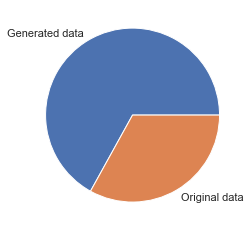

In [63]:
y=[newly_generaterData.shape[0] , original_data.shape[0]]
plt.pie(y,labels = ["Generated data", "Original data"])
plt.show() 

Skup za testiranje će sada imati samo podatke iz orginalnog podatkovnog skupa, dok skup za učenje će sadržavati podatke iz oba podskupa. Točnije skup za testiranje će sadržavati 268 zapisa iz orginalnog podskupa, dok ostatak će biti spremljen u skup za treniranje.

In [66]:
features=all_data.columns[:len(all_data.columns)-1] #Name of the features

X = all_data[features]
y = all_data['condition']

Test_full = original_data.head(268)
X_test_new = Test_full[features]
y_test_new = Test_full['condition']


Train_full = newly_generaterData.append(original_data.tail(21), ignore_index=True)
X_train_new = Train_full[features]
y_train_new = Train_full['condition']




I dalje 30% podataka je sadržano u skupu za testiranje, a 70% u skupu za učenje. Prvo ćemo normalizirati značajke, te zatim opet izgraditi modele, te usporediti rezultate s prijašnjom fazom.

In [67]:
X_train_new=scaler.fit_transform(X_train_new)
X_test_new=scaler.transform(X_test_new)

### 4.1 Decision Tree

The best max depth is  {'max_depth': 6}
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       148
           1       0.87      0.72      0.79       120

    accuracy                           0.83       268
   macro avg       0.84      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268

Accuracy: 0.8283582089552238


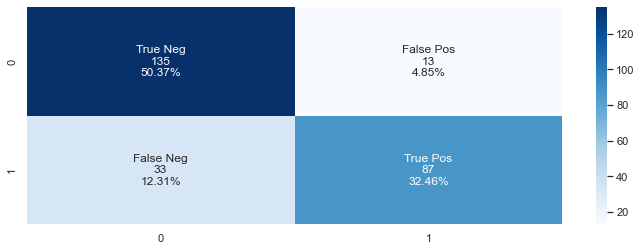

In [71]:
#Need to find the best depth
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=X_train_new, y=y_train_new)
tree_model = clf.best_estimator_
print ("The best max depth is ",clf.best_params_)
best_depth=clf.best_params_["max_depth"]


dtree = DecisionTreeClassifier(max_depth=best_depth)
dtree.fit(X_train_new, y_train_new)

tree.plot_tree(dtree, feature_names=features,class_names=["0","1"],filled=True)
#text_representation = tree.export_text(dtree)
#print(text_representation)
#Two  lines to make our compiler able to draw:
plt.savefig('my_plot2.png', dpi=300)
plt.close()


y_pred = dtree.predict(X_test_new)

cm = confusion_matrix(y_test_new,y_pred)


group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

print(classification_report(y_test_new, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test_new, y_pred))

### 4.2 Logistička regresija

Tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
Accuracy of the optimal model : 0.8727086533538146
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       148
           1       0.89      0.78      0.83       120

    accuracy                           0.86       268
   macro avg       0.86      0.85      0.85       268
weighted avg       0.86      0.86      0.86       268



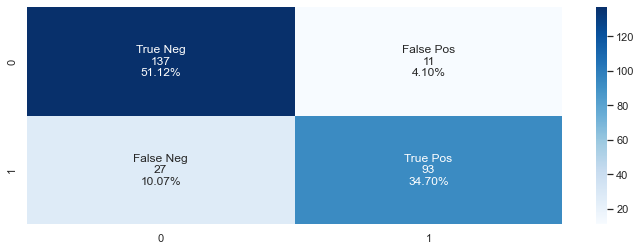

In [72]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_new,y_train_new)

print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy of the optimal model :",logreg_cv.best_score_)

C=logreg_cv.best_params_["C"]
reg_type=logreg_cv.best_params_["penalty"]

model_LogRef = LogisticRegression(C=C,penalty=reg_type).fit(X_train_new, y_train_new)

cm = confusion_matrix(y_test_new, model_LogRef.predict(X_test_new))

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

print(classification_report(y_test_new, model_LogRef.predict(X_test_new)))

###  4.3 Stroj potpornih vektora.

In [73]:
# defining parameter range
from sklearn.svm import SVC  
param_grid = {'C': [1, 10, 15], 
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_new, y_train_new)

# print best parameter after tuning
print("Best parametars : ",grid.best_params_)
  

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.887 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.879 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.815 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.904 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.871 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.863 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.798 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.504 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;,

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       148
           1       0.88      0.79      0.83       120

    accuracy                           0.86       268
   macro avg       0.86      0.85      0.85       268
weighted avg       0.86      0.86      0.86       268



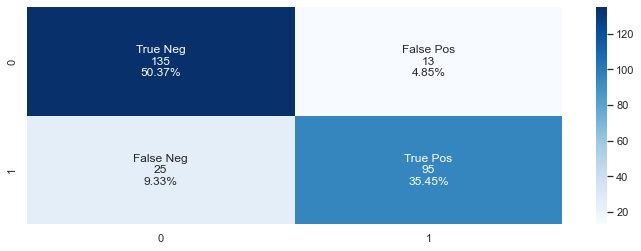

In [74]:
C=grid.best_params_["C"]
gamma=grid.best_params_["gamma"]
kernel=grid.best_params_["kernel"]
SVM_model = SVC(kernel=kernel,C=C,gamma=gamma) 
  
# fitting x samples and y classes 
SVM_model.fit(X_train_new, y_train_new) 
cm = confusion_matrix(y_test_new, SVM_model.predict(X_test_new))

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

print(classification_report(y_test_new, SVM_model.predict(X_test_new)))

### 4.4 Random Forest.

In [75]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6],
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_new, y_train_new)
print(CV_rfc.best_params_)


{'max_depth': 5, 'max_features': 'auto'}


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       148
           1       0.88      0.80      0.84       120

    accuracy                           0.86       268
   macro avg       0.86      0.86      0.86       268
weighted avg       0.86      0.86      0.86       268



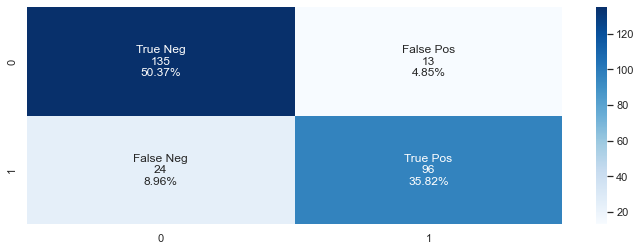

In [77]:
rf=RandomForestClassifier(max_depth =CV_rfc.best_params_["max_depth"] ,
                          max_features = CV_rfc.best_params_["max_features"]).fit(X_train_new, y_train_new)


cm = confusion_matrix(y_test_new, rf.predict(X_test_new))

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

print(classification_report(y_test_new, rf.predict(X_test_new)))

### 4.5 Naive Bayes

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       148
           1       0.86      0.79      0.83       120

    accuracy                           0.85       268
   macro avg       0.85      0.85      0.85       268
weighted avg       0.85      0.85      0.85       268



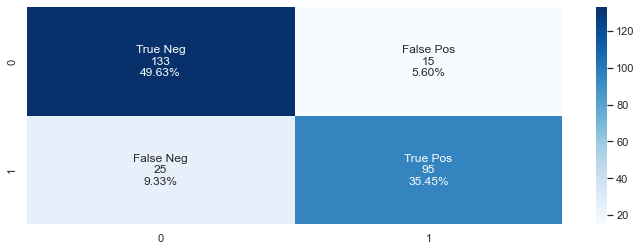

In [78]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train_new, y_train_new)
y_pred = gnb.predict(X_test_new)
cm = confusion_matrix(y_test_new, gnb.predict(X_test_new))

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

print(classification_report(y_test_new, gnb.predict(X_test_new)))